In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = np.random.randint(255,size=(32,32))
data = np.random.randint(2,size=(300))

In [3]:
f = open('outputs/original_data.txt','w')
for i in range(32):
    for j in range(32):
        f.write(str(img[i,j])+"\t")
    f.write("\n")
f.close()
header()

NameError: name 'header' is not defined

In [4]:
def header():
    ct = 0
    b1 = np.zeros((32,32),np.uint8)
    b2 = np.zeros((32,32),np.uint8)
    b3 = np.zeros((32,32),np.uint8)
    b4 = np.zeros((32,32),np.uint8)
    b5 = np.zeros((32,32),np.uint8)
    b6 = np.zeros((32,32),np.uint8)
    b7 = np.zeros((32,32),np.uint8)
    b8 = np.zeros((32,32),np.uint8)

    f1 = open('outputs/b1.txt','w')
    f2 = open('outputs/b2.txt','w')
    f3 = open('outputs/b3.txt','w')
    f4 = open('outputs/b4.txt','w')
    f5 = open('outputs/b5.txt','w')
    f6 = open('outputs/b6.txt','w')
    f7 = open('outputs/b7.txt','w')
    f8 = open('outputs/b8.txt','w')

    for i in range(32):    
        for j in range(32):
            intent = str(XOR2(dec2bin(img[i,j])))

            b1[i,j] = int(intent[7])
            f1.write(str(b1[i,j])+"\t")
            b2[i,j] = int(intent[6])
            f2.write(str(b2[i,j])+"\t")
            b3[i,j] = int(intent[5])
            f3.write(str(b3[i,j])+"\t")
            b4[i,j] = int(intent[4])
            f4.write(str(b4[i,j])+"\t")
            b5[i,j] = int(intent[3])
            f5.write(str(b5[i,j])+"\t")
            b6[i,j] = int(intent[2])
            f6.write(str(b6[i,j])+"\t")
            b7[i,j] = int(intent[1])
            f7.write(str(b7[i,j])+"\t")
            b8[i,j] = int(intent[0])
            f8.write(str(b8[i,j])+"\t")
    
        f1.write("\n")
        f2.write("\n")
        f3.write("\n")
        f4.write("\n")
        f5.write("\n")
        f6.write("\n")
        f7.write("\n")
        f8.write("\n")
    
    #print(np.std(b1))
    #print(np.std(b2))
    #print(np.std(b3))
    #print(np.std(b4))
    #print(np.std(b5))
    #print(np.std(b6))
    #print(np.std(b7))
    #print(np.std(b8))
    
    f1.write("\n")
    f2.write("\n")
    f3.write("\n")
    f4.write("\n")
    f5.write("\n")
    f6.write("\n")
    f7.write("\n")
    f8.write("\n")
        
    f1.close()
    f2.close()
    f3.close()
    f4.close()
    f5.close()
    f6.close()
    f7.close()
    f8.close()
    
    f1 = open('outputs/b1.txt','a')
    f2 = open('outputs/b2.txt','a')
    f3 = open('outputs/b3.txt','a')
    f4 = open('outputs/b4.txt','a')
    f5 = open('outputs/b5.txt','a')
    f6 = open('outputs/b6.txt','a')
    f7 = open('outputs/b7.txt','a')
    f8 = open('outputs/b8.txt','a')
    
    alpha0 = []
    alpha2 = []
    alpha3 = []
    alpha4 = []
    alpha5 = []
    alpha6 = []
    alpha7 = []
    alpha8 = []
    for i in range(0,32,4):
        for j in range(0,32,4):
            b1_ex,b2_ex,b3_ex,b4_ex,b5_ex,b6_ex,b7_ex,b8_ex = obtain_4(i,j,b1,b2,b3,b4,b5,b6,b7,b8)
            alpha0.append(alpha1(b1_ex))
            alpha2.append(alpha1(b2_ex))
            alpha3.append(alpha1(b3_ex))
            alpha4.append(alpha1(b4_ex))
            alpha5.append(alpha1(b5_ex))
            alpha6.append(alpha1(b6_ex))
            alpha7.append(alpha1(b7_ex))
            alpha8.append(alpha1(b8_ex))
    
    print(np.mean(alpha0))
    print(np.mean(alpha2))
    print(np.mean(alpha3))
    print(np.mean(alpha4))
    print(np.mean(alpha5))
    print(np.mean(alpha6))
    print(np.mean(alpha7))
    print(np.mean(alpha8),"\n\n")
    
    for i in range(0,32,4):
        for j in range(0,32,4):
            b1_ex,b2_ex,b3_ex,b4_ex,b5_ex,b6_ex,b7_ex,b8_ex = obtain_4(i,j,b1,b2,b3,b4,b5,b6,b7,b8)
            alpha01 = alpha1(b1_ex)
            if alpha01 > np.mean(alpha0):
                print("b1\n",b1_ex)
                print(alpha01,"\n")
            alpha21 = alpha1(b2_ex)
            if alpha21 > np.mean(alpha2):
                print("b2\n",b2_ex)
                print(alpha21,"\n")
            alpha31 = alpha1(b3_ex)
            if alpha31 > np.mean(alpha3):
                print("b3\n",b3_ex)
                print(alpha31,"\n")
            alpha41 = alpha1(b4_ex)
            if alpha41 > np.mean(alpha4):
                print("b4\n",b4_ex)
                print(alpha41,"\n")
            alpha51 = alpha1(b5_ex)
            if alpha51 > np.mean(alpha5):
                print("b5\n",b5_ex)
                print(alpha51,"\n")
            alpha61 = alpha1(b6_ex)
            if alpha61 > np.mean(alpha6):
                print("b6\n",b6_ex)
                print(alpha61,"\n")
            alpha71 = alpha1(b7_ex)
            if alpha71 > np.mean(alpha7):
                print("b7\n",b7_ex)
                print(alpha71,"\n")
            alpha81 = alpha1(b8_ex)
            if alpha81 > np.mean(alpha8):
                print("b8\n",b8_ex)
                print(alpha81,"\n")

    f1.close()
    f2.close()
    f3.close()
    f4.close()
    f5.close()
    f6.close()
    f7.close()
    f8.close()

    #b1 = con_1_255(b1)
    #b2 = con_1_255(b2)
    #b3 = con_1_255(b3)
    #b4 = con_1_255(b4)
    #b5 = con_1_255(b5)
    #b6 = con_1_255(b6)
    #b7 = con_1_255(b7)
    #b8 = con_1_255(b8)

    #img_hori1 = np.concatenate((b1,b2,b3,b4),axis=1)
    #img_hori2 = np.concatenate((b5,b6,b7,b8),axis=1)
    #cv2.imshow('b1,b2,b3,b4',img_hori1)
    #cv2.imshow('b5,b6,b7,b8',img_hori2)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

In [5]:
def obtain_4(m,n,b11,b22,b33,b44,b55,b66,b77,b88):
    
    b1 = np.zeros((4,4),np.uint8)
    b2 = np.zeros((4,4),np.uint8)
    b3 = np.zeros((4,4),np.uint8)
    b4 = np.zeros((4,4),np.uint8)
    b5 = np.zeros((4,4),np.uint8)
    b6 = np.zeros((4,4),np.uint8)
    b7 = np.zeros((4,4),np.uint8)
    b8 = np.zeros((4,4),np.uint8)
    
    f1 = open('outputs/b1.txt','a')
    f2 = open('outputs/b2.txt','a')
    f3 = open('outputs/b3.txt','a')
    f4 = open('outputs/b4.txt','a')
    f5 = open('outputs/b5.txt','a')
    f6 = open('outputs/b6.txt','a')
    f7 = open('outputs/b7.txt','a')
    f8 = open('outputs/b8.txt','a')
    
    for i in range(4):
        for j in range(4):
    
            b1[i,j] = int(b11[i+m,j+n])
            f1.write(str(b1[i,j])+"\t")
            b2[i,j] = int(b22[i+m,j+n])
            f2.write(str(b2[i,j])+"\t")
            b3[i,j] = int(b33[i+m,j+n])
            f3.write(str(b3[i,j])+"\t")
            b4[i,j] = int(b44[i+m,j+n])
            f4.write(str(b4[i,j])+"\t")
            b5[i,j] = int(b55[i+m,j+n])
            f5.write(str(b5[i,j])+"\t")
            b6[i,j] = int(b66[i+m,j+n])
            f6.write(str(b6[i,j])+"\t")
            b7[i,j] = int(b77[i+m,j+n])
            f7.write(str(b7[i,j])+"\t")
            b8[i,j] = int(b88[i+m,j+n])
            f8.write(str(b8[i,j])+"\t")
        f1.write("\n")
        f2.write("\n")
        f3.write("\n")
        f4.write("\n")
        f5.write("\n")
        f6.write("\n")
        f7.write("\n")
        f8.write("\n")
    f1.write("\n\n")
    f2.write("\n\n")
    f3.write("\n\n")
    f4.write("\n\n")
    f5.write("\n\n")
    f6.write("\n\n")
    f7.write("\n\n")
    f8.write("\n\n")

    f1.close()
    f2.close()
    f3.close()
    f4.close()
    f5.close()
    f6.close()
    f7.close()
    f8.close()
    
    return b1,b2,b3,b4,b5,b6,b7,b8

In [6]:
def con_1_255(b):
    for counti in range(32):
        for countj in range(32):
            if str(b[counti,countj]) == '1':
                b[counti,countj] = np.uint8(255)
    return b

In [7]:
# Binary to Decimal convertor
def bin2dec(binar):
    binar = int(binar)
    dec = 0
    i = 0
    while binar > 0:
        dec = dec + (int(binar%10)*np.power(2,i))
        i = i+1
        binar = int(binar/10)
    return dec

In [8]:
# Decimal to Binary convertor
def dec2bin(dec):
    inverse = ''
    binary = ''
    while dec != 0:
        inverse = inverse + str( int(dec % 2) )
        dec = int(dec / 2)
    if len(inverse) <= 8:
        size = len(inverse)
        for i in range(8-size):
            inverse = inverse + '0'
    for i in range(len(inverse)-1,-1,-1):
        binary = binary + str(inverse[i])
    return binary

In [9]:
# XOR operation
def XOR2(d1):
    enc_data = str(d1[0])
    for ext_data in range(1,len(d1)):
        if d1[ext_data] == '0' and d1[ext_data - 1] == '0':
            enc_data = enc_data + '0'
        elif d1[ext_data] == '0' and d1[ext_data - 1] == '1':
            enc_data = enc_data + '1'
        elif d1[ext_data] == '1' and d1[ext_data - 1] == '0':
            enc_data = enc_data + '1'
        elif d1[ext_data] == '1' and d1[ext_data - 1] == '1':
            enc_data = enc_data + '0'
    return enc_data

In [10]:
def alpha1(b):
    x = 0
    count = 0
    change = 0
    for j in range(4):
        for k in range(4):
            if j == 0 and k == 0:
                count = 0
                change = b[j,k]
            else:
                if change != b[j,k]:
                    count = count + 1
                    change = b[j,k]
    x = count/31
    return x      

In [2]:
x = []
count = 0
change = 0
for i in range(1000000):
    for j in range(4):
        for k in range(4):
            b = np.random.randint(2,size=(4,4))
            if j == 0 and k == 0:
                count = 0
                change = b[j,k]
            else:
                if change != b[j,k]:
                    count = count + 1
                    change = b[j,k]
        x.append(count/31)    

In [3]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

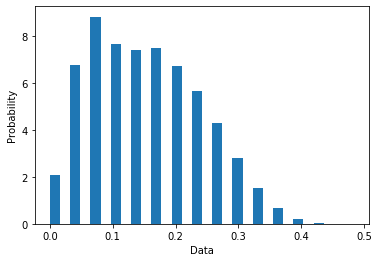

In [4]:
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability')
plt.xlabel('Data')

In [5]:
np.mean(x)

0.1451655403225807

In [144]:
import numpy as np
import cv2

In [145]:
# XOR operation
def XOR(data,key):
    data = str(data)
    #print("data ",data)
    key = str(key)
    #print("key ",key)
    enc_data = ''
    for ext_data in range(len(data)):
        if data[ext_data] == '0' and key[ext_data] == '0':
            enc_data = enc_data + '0'
        elif data[ext_data] == '0' and key[ext_data] == '1':
            enc_data = enc_data + '1'
        elif data[ext_data] == '1' and key[ext_data] == '0':
            enc_data = enc_data + '1'
        elif data[ext_data] == '1' and key[ext_data] == '1':
            enc_data = enc_data + '0'
    return enc_data

In [146]:
# XOR operation
def XOR1(h,w,d1,d2):
    enc_data = np.zeros((h,w,1),np.uint8)
    for ext_data in range(h):
        for ext_dataj in range(w):
            if d2[ext_data,ext_dataj] == 0:
                enc_data[ext_data,ext_dataj] =  0
            elif d2[ext_data,ext_dataj] == 1:
                enc_data[ext_data,ext_dataj] =  1
            elif d2[ext_data,ext_dataj] == 1:
                enc_data[ext_data,ext_dataj] =  1
            elif d2[ext_data,ext_dataj] == 1:
                enc_data[ext_data,ext_dataj] =  0
    return enc_data

In [147]:
# XOR operation
def CGC_PBC(d1):
    enc_data = str(d1[0])
    for ext_data in range(1,len(d1)):
        if d1[ext_data] == '0' and d1[ext_data - 1] == '0':
            enc_data = enc_data + '0'
        elif d1[ext_data] == '0' and d1[ext_data - 1] == '1':
            enc_data = enc_data + '1'
        elif d1[ext_data] == '1' and d1[ext_data - 1] == '0':
            enc_data = enc_data + '1'
        elif d1[ext_data] == '1' and d1[ext_data - 1] == '1':
            enc_data = enc_data + '0'
    return enc_data

In [148]:
def alpha1(h,w,b):
    x = 0
    count = 0
    change = 0
    for j in range(h):
        for k in range(w):
            if j == 0 and k == 0:
                count = 0
                change = b[j,k]
            else:
                if change != b[j,k]:
                    count = count + 1
                    change = b[j,k]
    x = count/(h*w-1)
    return x      

In [149]:
def conjugate(h,w,b_ex):  
    wc = np.zeros((h,w,1),np.uint8)
    b_ex_tmp = XOR1(h,w,wc,b_ex)
    return b_ex_tmp

In [150]:
# Decimal to Binary convertor
def dec2bin(dec):
    inverse = ''
    binary = ''
    while dec != 0:
        inverse = inverse + str( int(dec % 2) )
        dec = int(dec / 2)
    if len(inverse) <= 8:
        size = len(inverse)
        for i in range(8-size):
            inverse = inverse + '0'
    for i in range(len(inverse)-1,-1,-1):
        binary = binary + str(inverse[i])
    return binary

In [151]:
#t = np.random.randint(2,size=(1999999))
#binary = ""
#for e in range(len(t)):
#    binary = binary + str(t[e])

In [152]:
# Binary to Decimal convertor
def bin2dec(binar):
    binar = int(binar)
    dec = 0
    i = 0
    while binar > 0:
        dec = dec + (int(binar%10)*np.power(2,i))
        i = i+1
        binar = int(binar/10)
    return dec

In [169]:
# Secret Message into ASCII and ASCII into Binary format
file = open('input.txt','r')
secret_message = ''
for line in file.readlines():
    secret_message = secret_message + str(line)
binary = ''
key = ''
key = input("Enter a numeric key of 4 digits.. ")
count = 0
tmp = ''
while True:
    if key.isnumeric() and (len(key) == 4):
        sum1 = 0
        for i in range(len(key)):
            sum1 = sum1 + ord(key[i])
        key = str(dec2bin(sum1))
        print("Converting Message to Binary and encrypting...")
        for pos in range(len(secret_message)):
            if ord(secret_message[pos]) <= 255:
                if count < 8:
                    tmp = str(XOR(dec2bin(ord(secret_message[pos])),key))# coverting Secret code into ASCII and ASCII into Encrypted Binary.
                    binary = binary + tmp
                else:
                    tmp = count = 0
        print("\nMessage Conversion Successfull.\n")
        break;
    else:
        print("please enter only 4 numeric digits the key")
        key = input("Enter a numeric key of 4 digits..")

len_b = len(binary)
if (len_b-(int(len_b/64)*64)) != 0:
    extra = len_b-(int(len_b/64)*64)
    for pos in range(64-extra):
        binary = binary + '0'
        
print(len(binary)/64)

Enter a numeric key of 4 digits..  7607


Converting Message to Binary and encrypting...

Message Conversion Successfull.

1566.0


In [306]:
img = cv2.imread('cover_raw.png')
height,width,alpha = img.shape

print(len(binary))

img_b = np.zeros((height,width,1),np.uint8)
img_g = np.zeros((height,width,1),np.uint8)
img_r = np.zeros((height,width,1),np.uint8)

sub_img = np.zeros((height,width,1),np.uint8)

bit_coded = 0
for color in range(3):
    for m in range(height):
        for n in range(width):
            b,g,r = img[m,n]
            
            if color == 0:
                sub_img[m,n] = b
                
            elif color == 1:
                sub_img[m,n] = g
                
            elif color == 2:
                sub_img[m,n] = r
                
    img_sub1 = np.zeros((height,width,1),np.uint8)
    img_sub2 = np.zeros((height,width,1),np.uint8)
    img_sub3 = np.zeros((height,width,1),np.uint8)
    img_sub4 = np.zeros((height,width,1),np.uint8)
    img_sub5 = np.zeros((height,width,1),np.uint8)
    img_sub6 = np.zeros((height,width,1),np.uint8)
    img_sub7 = np.zeros((height,width,1),np.uint8)
    img_sub8 = np.zeros((height,width,1),np.uint8)

    meta_loc = 0
    meta_data = ''
    for indic in range(8):
        patched_loc = ''
        meta_data = ''
        bt = np.zeros((height,width,1),np.uint8)
        for m in range(height):
            for n in range(width):
                shape = str(dec2bin(sub_img[m,n]))
                if indic == 0:
                    img_sub1[m,n] = int(shape[indic])
                elif indic == 1:
                    img_sub2[m,n] = int(shape[indic])
                elif indic == 2:
                    img_sub3[m,n] = int(shape[indic])
                elif indic == 3:
                    img_sub4[m,n] = int(shape[indic])
                elif indic == 4:
                    img_sub5[m,n] = int(shape[indic])
                else:
                    bt[m,n] = int(shape[indic])
        if indic > 4:
            mn = []
            if (height-(int(height/8)*8)) >= 2:
                meta_loc = (int(height/8)*8)
                
            elif (height-(int(height/8)*8)) < 2:
                meta_loc = (int(height/8)*8) - 8
                
            print(meta_loc) 
            
            for m in range(0,meta_loc,8):
                for n in range(0,width,8):
                    if (n+8) >= width:
                        break
                    oalpha = alpha1(8,8,bt[m:m+8,n:n+8])
                    mn.append(oalpha)
            print("loc = ",meta_loc)
            mean1 = np.mean(mn)
            std1 = np.std(mn)
            
            print(mean1)
            print(std1)
            
            count1 = bit_coded
            print("bit_coded",bit_coded,'len_binary',len(binary))
            if bit_coded < len(binary):
                for m in range(0,meta_loc,8):
                    for n in range(0,int(width/8)*8,8):
                        count1 = bit_coded
                        
                        oalpha = alpha1(8,8,bt[m:m+8,n:n+8])

                        bi = np.zeros((8,8,1),np.uint8)
                        for i in range(8):
                            for j in range(8):
                                if count1 < len(binary):
                                    bi[i,j] = int(binary[count1])
                                    count1 = count1 + 1
                        
                        #print(count1)
                        dalpha = alpha1(8,8,bi)
                        if oalpha > (mean1-0*std1):
                            if dalpha <= (mean1-0*std1):
                                b_con = conjugate(8,8,bi) 
                                if (1-dalpha) <= (mean1-0*std1):
                                    print((1-dalpha),"  value can not ne coded")
                                else:
                                    bt[m:m+8,n:n+8] = b_con
                                    patched_loc = patched_loc + "1"
                                    
                                    bit_coded = bit_coded + 64
                            else:
                                bt[m:m+8,n:n+8] = bi
                                patched_loc = patched_loc + "0"
                                
                                bit_coded = bit_coded + 64
                
                len_patch = len(patched_loc)
                if len(patched_loc)-(int(len(patched_loc)/8)*8) != 0:
                    for a in range(8-len(patched_loc)-(int(len(patched_loc)/8)*8)):
                        patched_loc = patched_loc + "0"
                
                #tmp_patch_loc = str(len_patch)
                #str_len_patch = ''
                #for a in range(len(tmp_patch_loc)):
                 #   str_len_patch = str_len_patch + dec2bin(int(tmp_patch_loc[a]))
                
                print(len_patch)
                print(patched_loc)
                
                tmp_patch_loc = ''
                
                for a in range(0,len(patched_loc),8):
                    tmp_patch_loc = tmp_patch_loc + str(bin2dec(patched_loc[a:a+8]))
                
                
                #tmp_patch_loc = tmp_patch_loc + str(len_patch)
                    
                patched_loc = tmp_patch_loc + " " + str(len_patch) + " "
                print(patched_loc)
                
                meta_data = ''
                tmp_meta = str(meta_loc)+" "+str(mean1)+" "+str(std1)+" "+str(len(binary))+" "+patched_loc
                print("tmp_meta ",tmp_meta)
                for m in range(len(tmp_meta)):
                    meta_data = meta_data + str(dec2bin(ord(tmp_meta[m])))

                print(meta_data)

                meta_ct = 0    
                for m in range(meta_loc,height):
                    for n in range(width):
                        if meta_ct >= len(meta_data):
                            break
                        if bt[m,n] != int(meta_data[meta_ct]):
                            bt[m,n] = int(meta_data[meta_ct])
                        meta_ct = meta_ct + 1
                        
                
            n = indic + 1
            if n == 1:
                img_sub1 = bt
            elif n == 2:
                img_sub2 = bt
            elif n == 3:
                img_sub3 = bt
            elif n == 4:
                img_sub4 = bt
            elif n == 5:
                img_sub5 = bt
            elif n == 6:
                img_sub6 = bt
            elif n == 7:
                img_sub7 = bt
            elif n == 8:
                img_sub8 = bt
                
    img_channel = np.zeros((height,width,1),np.uint8)
    for m in range(height):
        for n in range(width):
            stegano = str(int(img_sub1[m,n]))+str(int(img_sub2[m,n]))+str(int(img_sub3[m,n]))+str(int(img_sub4[m,n]))+str(int(img_sub5[m,n]))+str(int(img_sub6[m,n]))+str(int(img_sub7[m,n]))+str(int(img_sub8[m,n]))
            #if sub_img[m,n] == int(bin2dec(stegano)):
            #    img_channel[m,n] = np.uint8(bin2dec(CGC_PBC(stegano)))
            #else:
            img_channel[m,n] = np.uint8(bin2dec(stegano))
            
    if color == 0:
        img_b = img_channel 
                
    elif color == 1:
        img_g = img_channel
                
    elif color == 2:
        img_r = img_channel

stegano_img = np.zeros((height,width,3),np.uint8)
for m in range(height):
    for n in range(width):
        stegano_img[m,n] = img_b[m,n],img_g[m,n],img_r[m,n]

print(bit_coded," were coded")
cv2.imshow("cover image",img)
cv2.imshow("stegano image",stegano_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("stegano_image_BCPS.png",stegano_img)

100224
232
loc =  232
0.42103490379352443
0.09819786268875283
bit_coded 0 len_binary 100224
0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
597
000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000010000000000000000000000000000000000000000000000
000000000000000000000000000000000000000000000000000000000000000100002000000 597 
tmp_meta  232 0.42103490379352443 0.09819786268875283 100224 000000000000000000000000000000000000000000000000000000000000000

True

In [297]:
def ext_data(h,w,d):
    tmp_data = ""
    for i in range(h):
        for j in range(w):
            tmp_data = tmp_data + str(int(d[i,j]))
    return tmp_data

In [307]:
stegano_image = cv2.imread('stegano_image_BCPS.png')
height,width,alpha = stegano_image.shape

img_b = np.zeros((height,width,1),np.uint8)
img_g = np.zeros((height,width,1),np.uint8)
img_r = np.zeros((height,width,1),np.uint8)

sub_img = np.zeros((height,width,1),np.uint8)

bit_coded = 0
len_binary = 0
bin_data = ''
data = ''

for color in range(3):
    for m in range(height):
        for n in range(width):
            b,g,r = stegano_image[m,n]
            
            if color == 0:
                sub_img[m,n] = b
                
            elif color == 1:
                sub_img[m,n] = g
                
            elif color == 2:
                sub_img[m,n] = r

    meta_loc = 0
    meta_data = ''
    for indic in range(8):
        
        bt = np.zeros((height,width,1),np.uint8)
        for m in range(height):
            for n in range(width):
                shape = str(dec2bin(sub_img[m,n]))
                if indic > 4:
                    bt[m,n] = int(shape[indic])
                else:
                    break
        
        if indic > 4:
            
            patched_loc = ''
            meta_data = ''
            patched_indic = 0
            mn = []
            mean1 = 0.0
            std1 = 0.0
            patched_loc = ''
            patch_loc_len = 0
            
            if (height-(int(height/8)*8)) >= 4:
                meta_loc = (int(height/8)*8)
                
            elif (height-(int(height/8)*8)) < 4:
                meta_loc = (int(height/8)*8) - 8
                
            print(meta_loc) 
            
            bt_str = ''
            for m in range(meta_loc,height):
                for n in range(width):
                    bt_str = bt_str + str(int(bt[m,n]))
            print(bt_str)
            ct = 0
            for n in range(0,len(bt_str),8):
                tmp_bt = ''
                for a in range(n,n+8):
                    tmp_bt  = tmp_bt + bt_str[a]
                            
                if str(chr(int(bin2dec(int(tmp_bt))))) == ' ':
                    
                    if ct == 0:
                        if meta_data != str(meta_loc):
                            print("meta_loc is not matched")
                            meta_loc = 0
                            break
                            
                        else:
                            print("meta_loc matched",meta_data)
                    
                    elif ct == 1:
                        mean1 = float(meta_data)
                        print("mean ",mean1)

                    elif ct == 2:
                        std1 = float(meta_data)
                        print("std ",std1)
                        
                    elif ct == 3:
                        len_binary = int(meta_data)
                        print("text length ",len_binary)
                        
                    elif ct == 4:
                        patched_loc = meta_data
                        print("ext_char ",patched_loc)
                        
                    elif ct == 5:
                        patch_loc_len = int(meta_data)
                        print("patch_loc_len ",patch_loc_len)
                        
                    else:
                        break
                    
                    ct = ct + 1
                    meta_data = ""
                    
                else:
                    meta_data = meta_data + str(chr(int(bin2dec(int(tmp_bt)))))
                        
            
            tmp_patched_loc = ''
                        
            for a in range(len(patched_loc)):
                tmp_patched_loc = tmp_patched_loc + dec2bin(int(patched_loc[a]))
                        
            patched_loc = tmp_patched_loc[0:patch_loc_len]
            print("patched_loc_len",len(patched_loc))
            
            #count1 = 0
            #print(len(patched_loc))
            if len(patched_loc) != 0:
                    
                for m in range(0,meta_loc-8,8):
                    for n in range(0,int(width/8)*8,8):

                        oalpha = alpha1(8,8,bt[m:m+8,n:n+8])

                        if oalpha > (mean1-0*std1):

                            print(patched_indic)
                            if patched_loc[patched_indic] == "1":

                                b_con = conjugate(8,8,bi) 
                                bin_data = bin_data + ext_data(8,8,b_con)  

                            elif patched_loc[patched_indic] == "0":

                                bin_data = bin_data + ext_data(8,8,bt[m:m+8,n:n+8])
                                    
                            patched_indic = patched_indic + 1
                            
data = ''
key = input("enter your key")
sum1 = 0
for i in range(len(key)):
    sum1 = sum1 + ord(key[i])
key = str(dec2bin(sum1))

for m in range(0,len(bin_data),8):
    data = data + str(chr(int(bin2dec(XOR(bin_data[m:m+8],str(key))))))
print("\n\n\n",data)
#cv2.imshow("cover image",img)
#cv2.imshow("stegano image",stegano_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

232
001100100011001100110010001000000011000000101110001101000011001000110001001100000011001100110100001110010011000000110011001101110011100100110011001101010011001000110100001101000011001100100000001100000010111000110000001110010011100000110001001110010011011100111000001101100011001000110110001110000011100000110111001101010011001000111000001100110010000000110001001100000011000000110010001100100011010000100000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100000011000000110000001100010011000000110000001100000011000000110010001100000011000000110000001100000011

enter your key 7607





 This chapter applies LSB Steganography technique for various
lossless file formats such as BMP, GIF and PNG.
The science which deals with the hidden communication is
called Steganography. There are different kinds of steganographic
techniques which are complex and which have strong and weak points
in hiding the invisible information in various file formats. The
innocent carriers are the possible cover carriers which will hold the
hidden communication. A Steganography method is admirably secure
only when the statistics of the cover information and the stego
information are similar with each other. In other words it conveys the
meaning that the relative entropy between the cover information and
the stego information is zero. The LSB embedding technique suggests
that data can be hidden in such a way that even the naked eye is
unable to identify the hidden information in the LSBs of the cover file.
In this chapter, a Steganography system is designed for hiding
and unhiding a secret fil